<a href="https://colab.research.google.com/github/JavZon/Customer_Churn/blob/main/CC2_Ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Task

Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***df***

In [2]:
url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/E-Commerce-Dataset.csv'
df=pd.read_csv(url)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.shape

(5630, 20)

In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
DaySinceLastOrder,307
OrderAmountHikeFromlastYear,265
Tenure,264
OrderCount,258
CouponUsed,256
HourSpendOnApp,255
WarehouseToHome,251
CustomerID,0
PreferredLoginDevice,0
Churn,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


**Churn column**

In [8]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [9]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.831616
1,0.168384


Visualize  **the churn**

**Barplot**

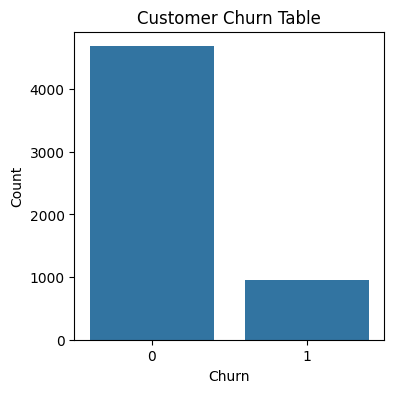

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(df['Churn'].value_counts())
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Customer Churn Table')
plt.show()

**PIE**

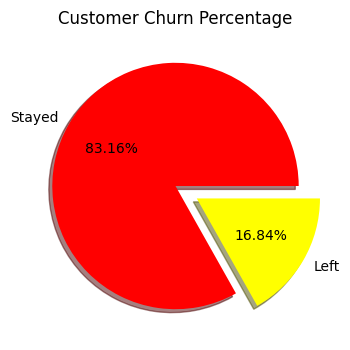

In [16]:
explode = (0, 0.2)
plt.figure(figsize=(4,4))
plt.pie(df['Churn'].value_counts(), labels=['Stayed', 'Left'],explode=explode,autopct='%1.2f%%',colors=('red','yellow'),shadow=True)
plt.title('Customer Churn Percentage')
plt.show()

**Histogram**

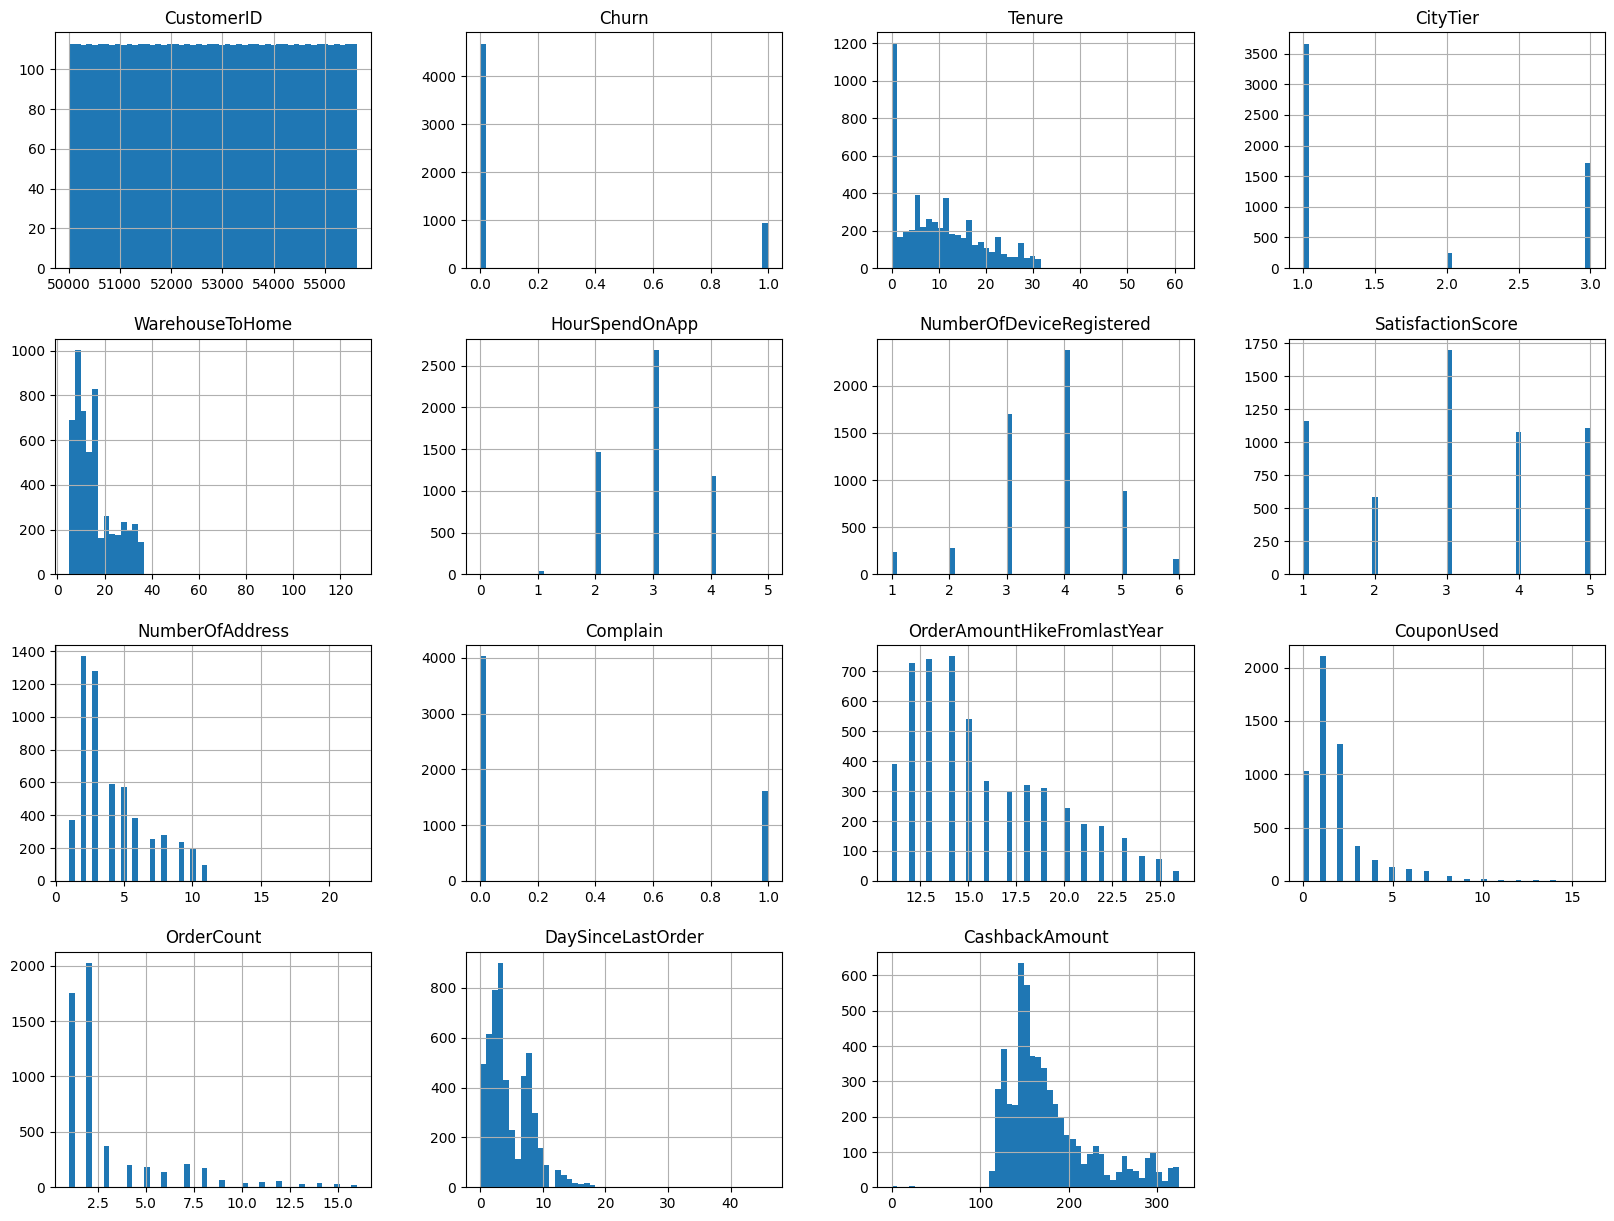

In [17]:
df.hist(bins=50,figsize=(20,15))
plt.show()

**Category columns**

In [18]:
df.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


In [19]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,2050
Mobile Phone,1271
Fashion,826
Mobile,809
Grocery,410
Others,264


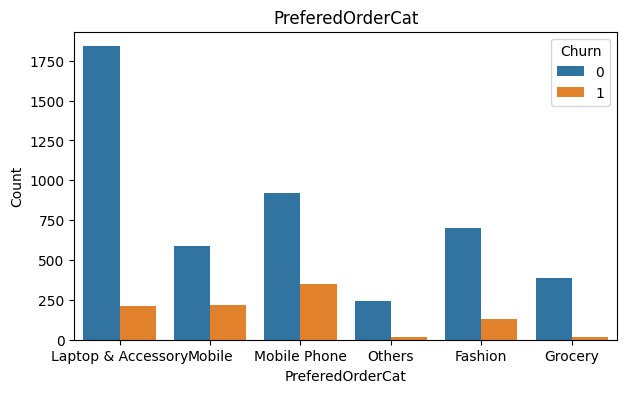

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x='PreferedOrderCat',data=df, hue='Churn')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Count')
plt.title('PreferedOrderCat')
plt.show()

**Plot1**

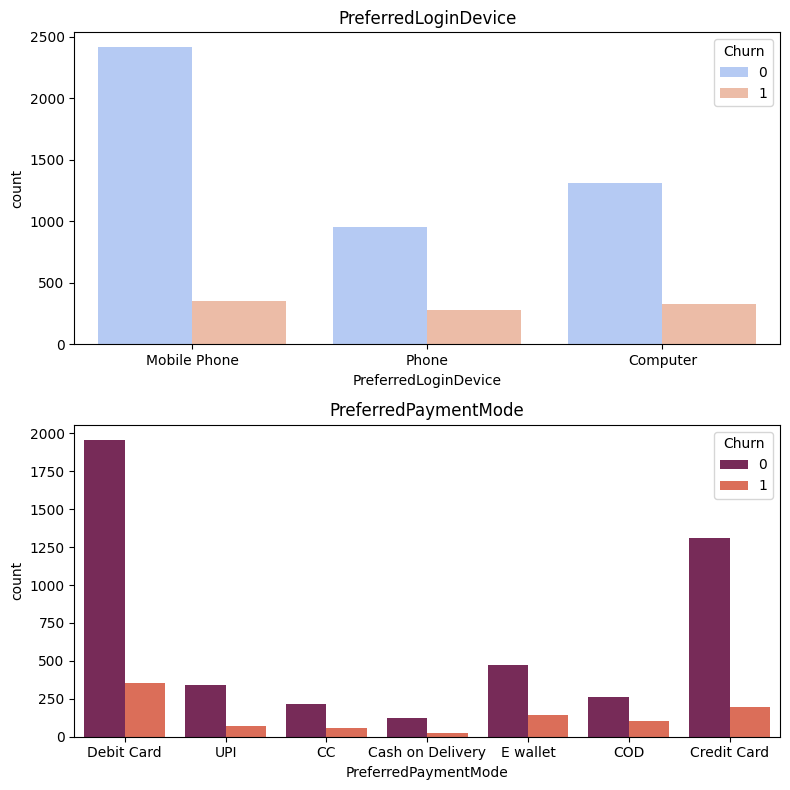

In [24]:
fig,axes=plt.subplots(2,1, figsize=(8,8))

sns.countplot(x='PreferredLoginDevice',data=df,hue='Churn',palette='coolwarm',ax=axes[0])
axes[0].set_title('PreferredLoginDevice')

sns.countplot(x='PreferredPaymentMode',data=df,hue='Churn',palette='rocket',ax=axes[1])
axes[1].set_title('PreferredPaymentMode')

plt.tight_layout()
plt.show()

**Plot2**

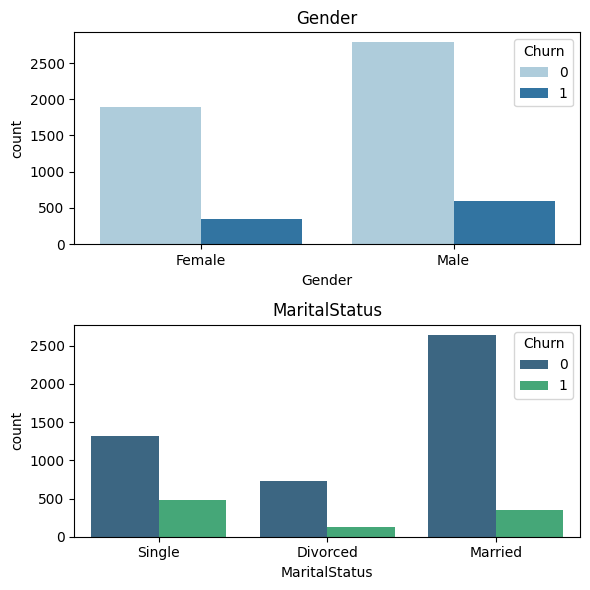

In [25]:
fig,axes=plt.subplots(2,1, figsize=(6,6))
sns.countplot(x='Gender', data=df, hue='Churn',palette='Paired', ax=axes[0])
axes[0].set_title('Gender')

sns.countplot(x='MaritalStatus', data=df, hue='Churn',palette='viridis', ax=axes[1])
axes[1].set_title('MaritalStatus')

plt.tight_layout()
plt.show()

**Catplot**

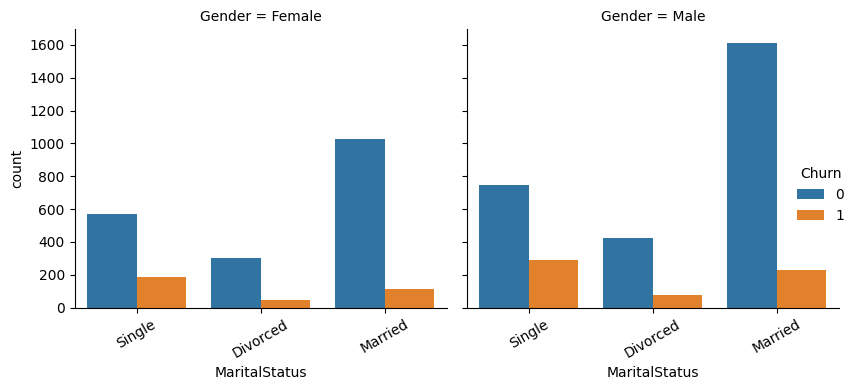

In [26]:
g = sns.catplot(x='MaritalStatus', hue='Churn', col='Gender', data=df, kind='count', height=4, aspect=1)
g.set_xticklabels(rotation=30)
plt.tight_layout()
plt.show()

**Plot3**

<ipython-input-27-2f2b08b4fd70>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
<ipython-input-27-2f2b08b4fd70>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)


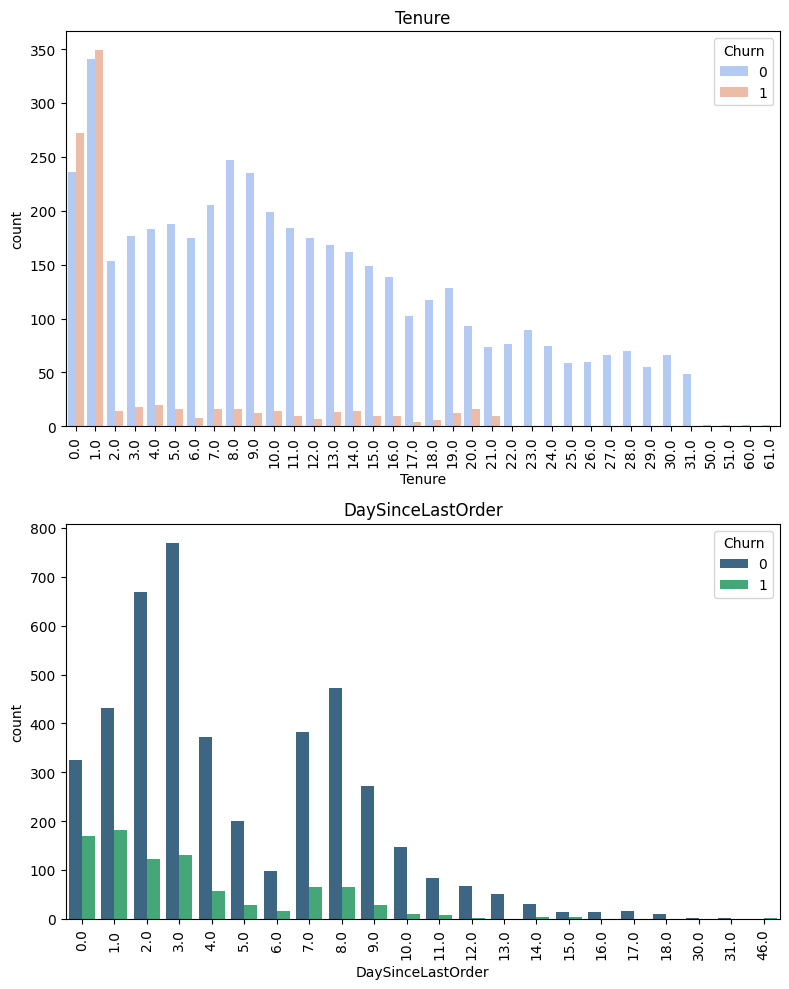

In [27]:
fig,axes=plt.subplots(2,1, figsize=(8,10))

sns.countplot(x='Tenure',data=df, hue='Churn', palette='coolwarm', ax=axes[0])
axes[0].set_title('Tenure')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)

sns.countplot(x='DaySinceLastOrder',data=df, hue='Churn', palette='viridis', ax=axes[1])
axes[1].set_title('DaySinceLastOrder')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

In [28]:
df.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


In [29]:
df2=df.drop(columns=['CustomerID','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])
df2.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,130


In [30]:
df2.corrwith(df2['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


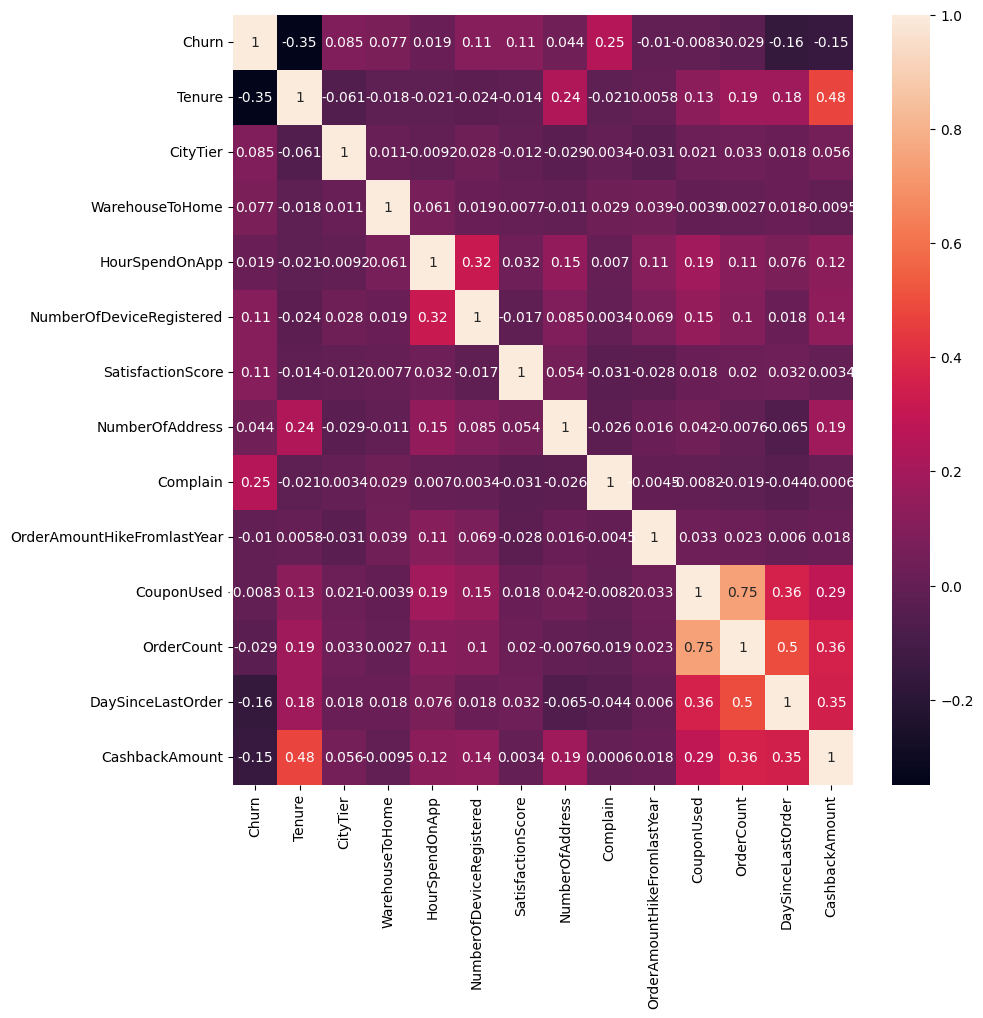

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

Working with NaN values

In [32]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [33]:
print("Sum of NaN values -",df.isnull().sum().sum())

Sum of NaN values - 1856


In [34]:
df2.corrwith(df2['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


As seen from the graph only **4** columns have correlation higher than 15% among numerical columns (**Tenure, Complain,DaySinceLastOrder and CashbackAmount**). As for categorial columns we choose **all of them** as they seem important to make decision for customer whether to stay or left .

Assigning new data

In [49]:
cols=['Tenure','Complain','DaySinceLastOrder','CashbackAmount','Gender','MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','Churn']
data=df[cols]
data.sample(5)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
5582,9.0,1,3.0,152,Male,Married,Mobile Phone,Credit Card,Mobile Phone,0
2647,8.0,0,3.0,127,Male,Married,Phone,CC,Mobile,0
798,7.0,0,8.0,145,Male,Divorced,Computer,Debit Card,Laptop & Accessory,0
1076,0.0,1,2.0,140,Male,Single,Phone,Credit Card,Mobile Phone,1
5295,20.0,0,13.0,301,Male,Single,Mobile Phone,Debit Card,Grocery,0


In [50]:
data.isnull().sum()

,0
Tenure,264
Complain,0
DaySinceLastOrder,307
CashbackAmount,0
Gender,0
MaritalStatus,0
PreferredLoginDevice,0
PreferredPaymentMode,0
PreferedOrderCat,0
Churn,0


In [51]:
data['DaySinceLastOrder'].mean().round()

5.0

In [52]:
data['Tenure'].mean().round()

10.0

Filling **NaN** values with means of each column

In [53]:
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean().round(),inplace=True)
data['Tenure'].fillna(data['Tenure'].mean().round(),inplace=True)

<ipython-input-53-1e439b4c331c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean().round(),inplace=True)
<ipython-input-53-1e439b4c331c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tenure'].fillna(data['Tenure'].mean().round(),inplace=True)


In [54]:
data.isnull().sum()

,0
Tenure,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0
Gender,0
MaritalStatus,0
PreferredLoginDevice,0
PreferredPaymentMode,0
PreferedOrderCat,0
Churn,0


**Label Encoding**

In [55]:
data.head(2)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
0,4.0,1,5.0,160,Female,Single,Mobile Phone,Debit Card,Laptop & Accessory,1
1,10.0,1,0.0,121,Male,Single,Phone,UPI,Mobile,1


In [42]:
encoder=LabelEncoder()

In [56]:
cols_to_encode=['Gender','MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat']

for col in cols_to_encode:
  data.loc[:,col]=encoder.fit_transform(data[col])

data.sample(5)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
2277,0.0,1,7.0,133,0,1,2,1,3,1
247,8.0,0,0.0,165,1,2,1,4,2,0
4267,1.0,1,4.0,182,1,2,1,5,2,1
888,3.0,0,2.0,148,0,1,2,5,2,0
3192,27.0,0,11.0,209,0,2,1,3,2,0


In [59]:
data.shape

(5630, 10)

In [60]:
data.head(2)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
0,4.0,1,5.0,160,0,2,1,4,2,1
1,10.0,1,0.0,121,1,2,2,6,3,1


**Scaling**

In [61]:
scaler=StandardScaler()

X=data.drop(columns='Churn')
y=data['Churn'].copy()

X=scaler.fit_transform(X)

**train_test_split**

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 9)
(1126, 9)
(4504,)
(1126,)


**ML** part

**Logistic Regression** model

In [85]:
LR_model=LogisticRegression()

LR_model.fit(X_train,y_train)

LogisticRegression()

Predicting and evaluating

Accuracy score - 0.8552397868561279

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       936
           1       0.63      0.34      0.44       190

    accuracy                           0.86      1126
   macro avg       0.76      0.65      0.68      1126
weighted avg       0.84      0.86      0.84      1126




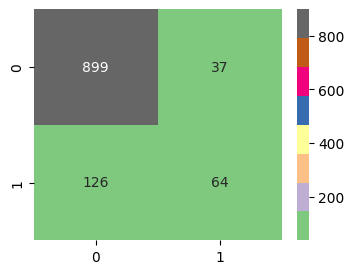

In [86]:
y_pred=LR_model.predict(X_test)

acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Accent', fmt='g')
plt.show()

Even if accuracy_score is 0.8555, when we look at confusion matrix there are lots of mistakenly predicted values

**KNN**

In [87]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

Accuracy score - 0.8854351687388987

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       936
           1       0.70      0.55      0.62       190

    accuracy                           0.89      1126
   macro avg       0.81      0.75      0.78      1126
weighted avg       0.88      0.89      0.88      1126




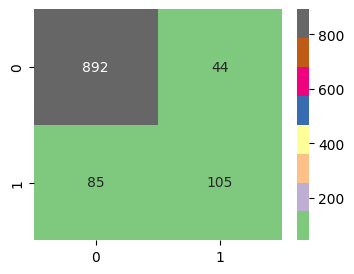

In [89]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Accent',annot=True, fmt='g')
plt.show()

As we can see from confusion matrix KNN algoritm has a better score than Logistic Regression algorithm

**RandomForestClassifier**

In [93]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)

Accuracy score - 0.9635879218472468

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.90      0.88      0.89       190

    accuracy                           0.96      1126
   macro avg       0.94      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126




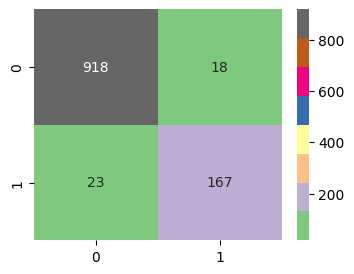

In [94]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat,cmap='Accent' ,annot=True, fmt='g')
plt.show()

The above confusion matrix depicts that **RandomForest** algorithm has very good results

**Decision Tree**

In [95]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
y_pred=DT_model.predict(X_test)

Accuracy score - 0.9609236234458259

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.88      0.89      0.88       190

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126




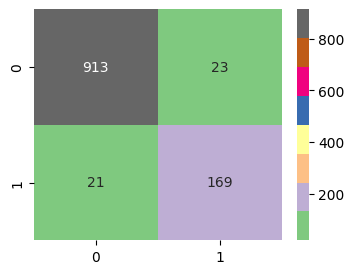

In [96]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat,cmap='Accent' ,annot=True, fmt='g')
plt.show()

**SVC** algorithm

In [97]:
SVC_model=SVC()
SVC_model.fit(X_train,y_train)
y_pred=SVC_model.predict(X_test)

Accuracy score - 0.8623445825932504

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       936
           1       0.66      0.37      0.48       190

    accuracy                           0.86      1126
   macro avg       0.77      0.67      0.70      1126
weighted avg       0.85      0.86      0.85      1126




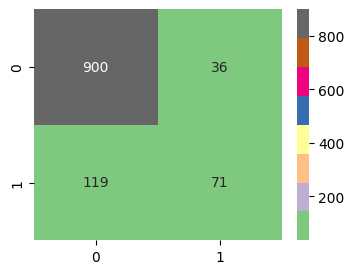

In [98]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat,cmap='Accent' ,annot=True, fmt='g')
plt.show()

**XGBClassifier**

In [99]:
XGB_model=XGBClassifier()
XGB_model.fit(X_train,y_train)
y_pred=XGB_model.predict(X_test)

Accuracy score - 0.9467140319715808

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       936
           1       0.88      0.79      0.83       190

    accuracy                           0.95      1126
   macro avg       0.92      0.89      0.90      1126
weighted avg       0.95      0.95      0.95      1126




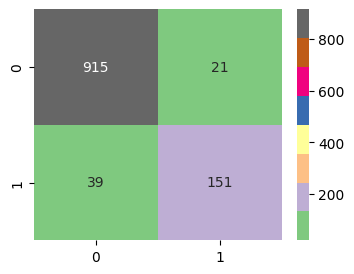

In [100]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
print()

class_rep=classification_report(y_test,y_pred)
print(class_rep)
print()

conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat,cmap='Accent' ,annot=True, fmt='g')
plt.show()

So the final result is - The best fit model is **Random Forest** model